<a href="https://colab.research.google.com/github/mkaushik-21/ILdata/blob/master/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Import the excel database and label it as df

In [12]:
from google.colab import files
uploaded = files.upload()

Saving IL solubilities database .xlsx to IL solubilities database  (1).xlsx


In [13]:
import io
df= pd.read_excel(io.BytesIO(uploaded['IL solubilities database .xlsx']))
df

,IL,cation,anion,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],CH=CH,CH=CH2,[Im13],[MIm],[MMIM],[Py],[MPy],[MPyrro],[MPip],[NH3],[NH2],[NH],[N],[P],[S],[BF4],[Cl],[DCA],[NO3],[PF6],[SCN],[TCB],[C(CN)3],[HSO4],[FSA],[Tf2N],[BETA],[FOR],[TFA],[C3F7CO2],[MeSO4],[EtSO4],[MDEGSO4],[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,[BMIM][BF4],[BMIM],[BF4],0.610,363.15,246.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.500,383.15,235.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.610,353.15,223.30,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.500,373.15,198.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.610,343.15,188.50,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,[HMIM][Tf2N],[HMIM],[Tf2N],0.592,298.15,35.86,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10112,[HMIM][Tf2N],[HMIM],[Tf2N],0.239,343.15,27.54,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10113,[HMIM][Tf2N],[HMIM],[Tf2N],0.396,298.15,20.15,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10114,[HMIM][Tf2N],[HMIM],[Tf2N],0.140,343.15,17.93,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Create a subset of dataset (cdf) with Temperature, pressure, and x_co2 to use for regression

In [14]:
cdf = df[['T (K)', 'P (bar)', 'x_CO2']]
cdf.head(10)

,T (K),P (bar),x_CO2
0,363.15,246.0,0.610
1,383.15,235.0,0.500
2,353.15,223.3,0.610
3,373.15,198.0,0.500
4,343.15,188.5,0.610
5,382.95,185.0,0.458
6,363.15,171.0,0.500
7,333.15,162.0,0.610
8,373.15,160.0,0.458
9,357.15,154.0,0.500


Graph pressure versus x_co2

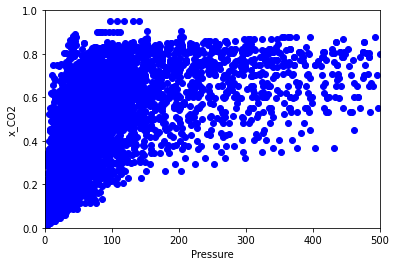

In [15]:
plt.scatter(cdf['P (bar)'], cdf['x_CO2'],  color='blue')
plt.xlabel("Pressure")
plt.ylabel("x_CO2")
plt.axis([0,500,0,1])
plt.show()

graph temperature versus x_co2

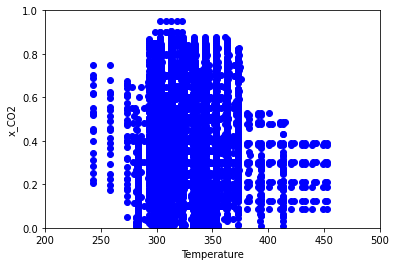

In [16]:
plt.scatter(cdf['T (K)'], cdf['x_CO2'],  color='blue')
plt.xlabel("Temperature")
plt.ylabel("x_CO2")
plt.axis([200,500,0,1])
plt.show()

Train the dataset

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Create regression line to degree 2

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x2 = np.asanyarray(train[['P (bar)', 'T (K)']])
train_y2 = np.asanyarray(train[['x_CO2']])

test_x2 = np.asanyarray(test[['P (bar)', 'T (K)']])
test_y2 = np.asanyarray(test[['x_CO2']])


poly = PolynomialFeatures(degree=2)
train_x2_poly = poly.fit_transform(train_x2)
train_x2_poly

array([[1.00000000e+00, 2.35000000e+02, 3.83150000e+02, 5.52250000e+04,
        9.00402500e+04, 1.46803922e+05],
       [1.00000000e+00, 2.23300000e+02, 3.53150000e+02, 4.98628900e+04,
        7.88583950e+04, 1.24714922e+05],
       [1.00000000e+00, 1.98000000e+02, 3.73150000e+02, 3.92040000e+04,
        7.38837000e+04, 1.39240922e+05],
       ...,
       [1.00000000e+00, 3.58600000e+01, 2.98150000e+02, 1.28593960e+03,
        1.06916590e+04, 8.88934225e+04],
       [1.00000000e+00, 2.75400000e+01, 3.43150000e+02, 7.58451600e+02,
        9.45035100e+03, 1.17751922e+05],
       [1.00000000e+00, 8.00000000e+00, 3.23150000e+02, 6.40000000e+01,
        2.58520000e+03, 1.04425922e+05]])

In [19]:
clf = linear_model.LinearRegression()
train_y2_ = clf.fit(train_x2_poly, train_y2)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  8.90156526e-03 -7.73101613e-03 -1.09326385e-05
  -9.31833828e-06  8.96878774e-06]]
Intercept:  [1.67906696]


Graph the regression line for degree 2

In [20]:
plt.scatter(train['P (bar)','T (K)'], train['x_CO2'],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("P/T")
plt.ylabel("x_CO2")

KeyError: ignored

Use evaluation metrics to determine whether the line is a good fit

In [21]:
from sklearn.metrics import r2_score

test_x2_poly = poly.fit_transform(test_x2)
test_y2_ = clf.predict(test_x2_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_ - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_ - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2_ , test_y2) )

Mean absolute error: 0.10
Residual sum of squares (MSE): 0.02
R2-score: 0.59


Create regression line to degree 3

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x3 = np.asanyarray(train[['P (bar)', 'T (K)']])
train_y3 = np.asanyarray(train[['x_CO2']])

test_x3 = np.asanyarray(test[['P (bar)', 'T (K)']])
test_y3 = np.asanyarray(test[['x_CO2']])


poly = PolynomialFeatures(degree=3)
train_x3_poly = poly.fit_transform(train_x3)
train_x3_poly

array([[1.00000000e+00, 2.35000000e+02, 3.83150000e+02, ...,
        2.11594588e+07, 3.44989218e+07, 5.62479229e+07],
       [1.00000000e+00, 2.23300000e+02, 3.53150000e+02, ...,
        1.76090796e+07, 2.78488422e+07, 4.40430749e+07],
       [1.00000000e+00, 1.98000000e+02, 3.73150000e+02, ...,
        1.46289726e+07, 2.75697027e+07, 5.19577502e+07],
       ...,
       [1.00000000e+00, 3.58600000e+01, 2.98150000e+02, ...,
        3.83402892e+05, 3.18771813e+06, 2.65035739e+07],
       [1.00000000e+00, 2.75400000e+01, 3.43150000e+02, ...,
        2.60262667e+05, 3.24288795e+06, 4.04065722e+07],
       [1.00000000e+00, 8.00000000e+00, 3.23150000e+02, ...,
        2.06816000e+04, 8.35407380e+05, 3.37452369e+07]])

In [23]:
clf = linear_model.LinearRegression()
train_y3_ = clf.fit(train_x3_poly, train_y3)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  3.50902890e-02 -5.18343598e-02 -7.64101166e-05
  -1.12148076e-04  1.35194354e-04  4.47177942e-08  1.19086230e-07
   1.01073617e-07 -1.17563724e-07]]
Intercept:  [6.65407086]


In [ ]:
plt.scatter(train['P (bar)','T (K)'], train['x_CO2'],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("P/T")
plt.ylabel("x_CO2")

KeyError: ignored

In [24]:
from sklearn.metrics import r2_score

test_x3_poly = poly.fit_transform(test_x3)
test_y3_ = clf.predict(test_x3_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y3)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y3) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y3) )

Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.76


Create Regression line for degree 4

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x4 = np.asanyarray(train[['P (bar)', 'T (K)']])
train_y4 = np.asanyarray(train[['x_CO2']])

test_x4 = np.asanyarray(test[['P (bar)', 'T (K)']])
test_y4 = np.asanyarray(test[['x_CO2']])


poly = PolynomialFeatures(degree=4)
train_x4_poly = poly.fit_transform(train_x4)
train_x4_poly

array([[1.00000000e+00, 2.35000000e+02, 3.83150000e+02, ...,
        8.10724662e+09, 1.32182619e+10, 2.15513917e+10],
       [1.00000000e+00, 2.23300000e+02, 3.53150000e+02, ...,
        6.21864646e+09, 9.83481862e+09, 1.55538119e+10],
       [1.00000000e+00, 1.98000000e+02, 3.73150000e+02, ...,
        5.45880113e+09, 1.02876345e+10, 1.93880345e+10],
       ...,
       [1.00000000e+00, 3.58600000e+01, 2.98150000e+02, ...,
        1.14311572e+08, 9.50418161e+08, 7.90204056e+09],
       [1.00000000e+00, 2.75400000e+01, 3.43150000e+02, ...,
        8.93091340e+07, 1.11279700e+09, 1.38655153e+10],
       [1.00000000e+00, 8.00000000e+00, 3.23150000e+02, ...,
        6.68325904e+06, 2.69961895e+08, 1.09047733e+10]])

In [26]:
clf = linear_model.LinearRegression()
train_y4_ = clf.fit(train_x4_poly, train_y4)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.12234625e-01 -2.12024198e-01 -3.61926500e-04
  -6.05865026e-04  8.29445664e-04  4.13875962e-07  1.24948781e-06
   1.16549585e-06 -1.43610359e-06 -1.51348831e-10 -7.27594790e-10
  -1.09335166e-09 -7.81322645e-10  9.28780261e-10]]
Intercept:  [20.26258893]


In [ ]:
plt.scatter(train['P (bar)','T (K)'], train['x_CO2'],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("P/T")
plt.ylabel("x_CO2")

KeyError: ignored

In [27]:
from sklearn.metrics import r2_score

test_x4_poly = poly.fit_transform(test_x4)
test_y4_ = clf.predict(test_x4_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y4_ - test_y4)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y4_ - test_y4) ** 2))
print("R2-score: %.2f" % r2_score(test_y4_ , test_y4) )

Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01
R2-score: 0.79
